<a href="https://colab.research.google.com/github/saatvikraoIITGN/ES-654-Machine-Learning/blob/main/ML_prerquisite_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question - 1
For each cell in the resulting $n*m$, 
* number of multiplications = $k$ 
* number of additions = $k - 1$ 

Therefore, 
* total number of multiplications = $nmk$
* total number of additions = $nm(k-1)$

## Question - 2

In [15]:
# python function to compute matrix multiplication
def multiply_matrices(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]

    return result

A = [[1, 2, 3], [4, 5, 6]]
B = [[1, 2], [3, 4], [5, 6]]
result = multiply_matrices(A, B)
print(result)  # prints [[22, 28], [49, 64]]

[[22, 28], [49, 64]]


In [19]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[1, 2], [3, 4], [5, 6]]

In [20]:
%%timeit -r 3 -n 10000
result = multiply_matrices(A, B)

11.6 µs ± 635 ns per loop (mean ± std. dev. of 3 runs, 10000 loops each)


In [21]:
%%timeit -r 3 -n 10000
result = np.matmul(A, B)

7.29 µs ± 1.02 µs per loop (mean ± std. dev. of 3 runs, 10000 loops each)


### Time Comparision
In general, the NumPy solution is faster because NumPy uses optimized C code to perform matrix operations, whereas the list-based solution uses Python loops, which are much slower. 

Also, NumPy stores data in a contiguous block of memory, which can make access faster than with a list of lists, where the data is stored in separate blocks of memory.

## Question - 3

### Given method

In [32]:
import sys

def median_pass(arr):
  n = len(arr)
  idx = 0
  used_idx = []

  if(n%2):
    for j in range(int((n+1)/2)):
      max_num = -sys.maxsize - 1

      for i in range(n):
        if(arr[i]>=max_num and i not in used_idx):
          max_num = arr[i]
          idx = i
      used_idx.append(idx)

    median = max_num
  else:
    for j in range(int(n/2)+1):
      if(j == int(n/2)):
        last_max = max_num
      max_num = -sys.maxsize - 1

      for i in range(n):
        if(arr[i]>=max_num and i not in used_idx):
          max_num = arr[i]
          idx = i
      used_idx.append(idx)
      
    median = (max_num + last_max)/2
    
    return median

### Optimized approach

We can find the median of an array by sorting the array first, and then selecting the middle element. The time complexity of sorting an array depends on the sorting algorithm used. 

- $O(n^2)$ : bubble sort, insertion sort 
- $O(n*log(n))$ : merge sort, quick sort
- $O(n)$ : counting sort  

Once the array is sorted, finding the median takes $O(1)$ time.

To find the median of an array without sorting it, we can use the "quickselect" algorithm, which has an average time complexity of $O(n)$.

In [33]:
def quickselect(arr, k):
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]

    if k < len(left):
        return quickselect(left, k)
    elif k >= len(arr) - len(right):
        return quickselect(right, k - (len(arr) - len(right)))
    else:
        return pivot

def median(arr):
    if len(arr) % 2 == 0:
        return (quickselect(arr, len(arr) // 2 - 1) + quickselect(arr, len(arr) // 2)) / 2
    else:
        return quickselect(arr, len(arr) // 2)

### Comparision 
To compare the performance of this implementation with the numpy.median routine, we can use the timeit module in Python. 

In [34]:
from numpy import random

arr = random.randint(100, size=(100))
print(arr)

[ 7  5 33 99  2 98 85  7 37 17 69 22 37 25 52 11 97 49 20 74 70 27 44 25
  6 60 35 55  5 45 12 19 53 62 12 20 27 79 33 84 78 69 12 60 56 76 96 40
  1 81 60 75 76  6 61 61 37 90 32 41 89 37 12 11 31 21 94 62 52 80 90 58
 50  7 87  7 37 85 65 55 52 81 30 67 87 43 95  9 66 17 84 56 67 36  7 29
 55  0  1 50]


In [35]:
%%timeit -r 3 -n 1000
# array pass method 
median_pass(arr)

1.33 ms ± 28.1 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [41]:
%%timeit -r 3 -n 1000
# quickslelect algorithm 
median(arr) 

90.8 µs ± 5.45 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


In [42]:
%%timeit -r 3 -n 1000
# numpy.median routine 
import numpy as np
np.median(arr) 

27.4 µs ± 3.9 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)


We see that numpy.median routine is faster than "quickselect" algorithm which is faster than given method in the question. 


## Question - 4
To find the gradient of the function with respect to x and y, we can use the following formula:

Gradient, $\triangledown = [$\frac{df}{dx}$, $\frac{df}{dy}$]

Derivative of the function with respect to x is:

$2xy + y^3 \times cos(x)$

Derivative of the function with respect to y is:

$x^2 + 3y^2 \times sin(x)$

So, the gradient of the function with respect to x and y is:

$\triangledown f(x,y)$ = [$2xy + y^3cos(x)$, $x^2 + 3y^2sin(x)$]

## Question - 5

In [35]:
import jax.numpy as np
from jax import grad

# defining the function 
def f(x, y):
  return x**2 * y + y**3 * np.sin(x)

grad_x = grad(f, argnums=0)
grad_y = grad(f, argnums=1)

x = 2.0
y = 3.0

print("Derivative of f wrt x: ", grad_x(x, y))  
print("Derivative of f wrt y: ", grad_y(x, y))  

Derivative of f wrt x:  0.7640352
Derivative of f wrt y:  28.55103


In [37]:
# graident using the previous method 
def f(x, y):
  return x**2 * y + y**3 * np.sin(x)

# derivative wrt x
def df_dx(x, y):
  return 2*x*y + y**3 * np.cos(x)

# derivative wrt y
def df_dy(x, y):
  return x**2 + 3 * y**2 * np.sin(x)

x = 2.0
y = 3.0

print("Derivative of f wrt x: ", df_dx(x, y))  
print("Derivative of f wrt y: ", df_dy(x, y)) 

Derivative of f wrt x:  0.7640352
Derivative of f wrt y:  28.55103


We see that using both the methods we get the same analytical solution. 

## Question - 6

In [44]:
import sympy

x, y = sympy.symbols('x y')

# equation 
f = (x**2)*y + (y**3)*sympy.sin(x)

# gradients wrt x and y 
gradient_x = sympy.diff(f, x)
gradient_y = sympy.diff(f, y)

print(f"Gradient with respect to x: {gradient_x}")
print(f"Gradient with respect to y: {gradient_y}")

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


We obtain the same differential equations as we got in Question-4. 

In [47]:
# taking same values as earlier 
x_val = 2.0
y_val = 3.0

gradient_x_val = gradient_x.subs({x: x_val, y: y_val})
gradient_y_val = gradient_y.subs({x: x_val, y: y_val})

print("Derivative of f wrt x: ", gradient_x_val)
print("Derivative of f wrt y: ", gradient_y_val)

Derivative of f wrt x:  0.764035413227155
Derivative of f wrt y:  28.5510305242934


We can see sympy gives the same result. 

## Question - 7

In [51]:
student_records = {
    2022: {
        "Branch 1": {
            1: {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            }
        },
        "Branch 2": {}
    },
    2023: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {}
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {}
    }
}

## Question - 8

In [1]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

# inserting values
student1 = Student(1, "N", {"Maths": 100, "English": 70})
branch1 = Branch("Branch 1", [student1])
year1 = Year(2022, [branch1])

student_records = [year1]

## Question - 9

### 1) $y = x$

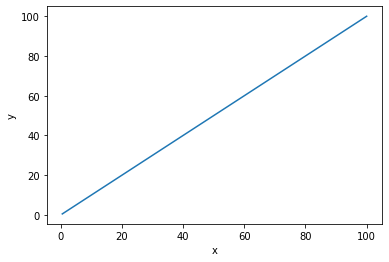

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# start, end of the domain, step size 
start, end, step = 0.5, 100.0, 0.5

# numpy's arange function generates the values in specified domain
x = np.arange(start, end+step, step)

# Evaluating the function at each point in the domain
y = [x_i for x_i in x]  # y = x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2) $y = x^2$

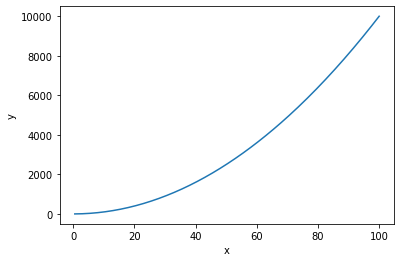

In [58]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [x_i**2 for x_i in x]  # y = x^2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 3) $y = \frac{x^3}{100}$

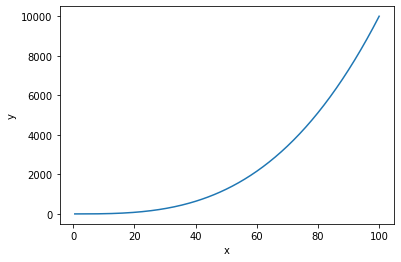

In [59]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [x_i**3/100 for x_i in x]  # y = x^3/100

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 4) $y = sin(x)$

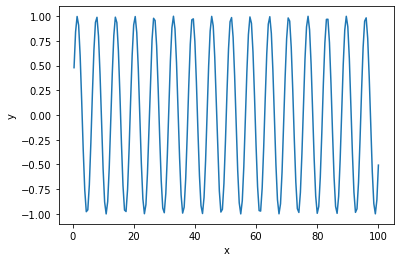

In [60]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [np.sin(x_i) for x_i in x]  # y = sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 5) $y = \frac{sin(x)}{x}$

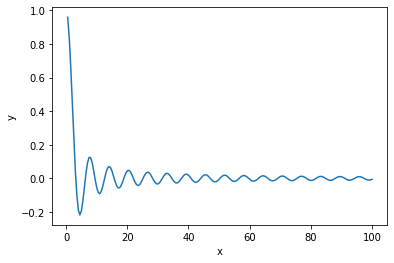

In [1]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [np.sin(x_i)/x_i for x_i in x]  # y = sin(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 6) $y = log(x)$

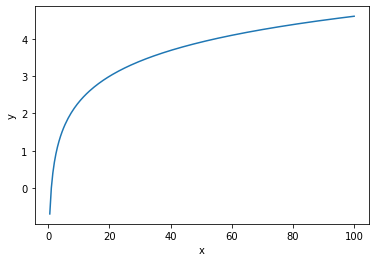

In [62]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [np.log(x_i) for x_i in x]  # y = log(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 7) $y = e^x$

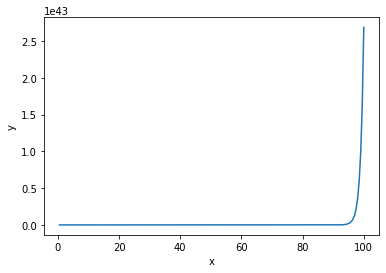

In [63]:
import numpy as np
import matplotlib.pyplot as plt

start, end, step = 0.5, 100.0, 0.5

x = np.arange(start, end+step, step)

y = [np.exp(x_i) for x_i in x]  # y = e^x

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Question - 10

In [64]:
import numpy as np

# matrix of size 20x5 containing random numbers from the range of 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))

print(matrix)

[[1.81293585 1.45457105 1.97717385 1.97041761 1.33305215]
 [1.1084561  1.10238673 1.3670573  1.68190516 1.24515864]
 [1.24161531 1.05788381 1.44686611 1.46737281 1.67786444]
 [1.47221909 1.61221272 1.66998737 1.15622719 1.91924072]
 [1.54821016 1.43006629 1.48893875 1.89281863 1.11035316]
 [1.44502312 1.88801897 1.05347262 1.96503389 1.91534203]
 [1.233091   1.33271481 1.37475516 1.82944033 1.39906904]
 [1.45009252 1.71452798 1.13869726 1.69262136 1.80010244]
 [1.05295647 1.17615459 1.35697331 1.2687624  1.91329691]
 [1.69620715 1.22667817 1.11190637 1.73152297 1.79686985]
 [1.07984552 1.93315787 1.99083994 1.31118033 1.77822547]
 [1.79357083 1.41170537 1.57917154 1.5319755  1.06917407]
 [1.37644459 1.67152515 1.77856469 1.41566932 1.18742436]
 [1.55908158 1.37712997 1.62148756 1.0396287  1.84755442]
 [1.67722755 1.82487927 1.05520087 1.59679381 1.8010425 ]
 [1.83863166 1.55880768 1.62923043 1.80118306 1.81956477]
 [1.73417936 1.40886442 1.22466641 1.64289343 1.0573185 ]
 [1.9726369  1

In [65]:
import pandas as pd

# dataframe 
df = pd.DataFrame(data=matrix, columns=['a', 'b', 'c', 'd', 'e'])

print(df)

           a         b         c         d         e
0   1.812936  1.454571  1.977174  1.970418  1.333052
1   1.108456  1.102387  1.367057  1.681905  1.245159
2   1.241615  1.057884  1.446866  1.467373  1.677864
3   1.472219  1.612213  1.669987  1.156227  1.919241
4   1.548210  1.430066  1.488939  1.892819  1.110353
5   1.445023  1.888019  1.053473  1.965034  1.915342
6   1.233091  1.332715  1.374755  1.829440  1.399069
7   1.450093  1.714528  1.138697  1.692621  1.800102
8   1.052956  1.176155  1.356973  1.268762  1.913297
9   1.696207  1.226678  1.111906  1.731523  1.796870
10  1.079846  1.933158  1.990840  1.311180  1.778225
11  1.793571  1.411705  1.579172  1.531976  1.069174
12  1.376445  1.671525  1.778565  1.415669  1.187424
13  1.559082  1.377130  1.621488  1.039629  1.847554
14  1.677228  1.824879  1.055201  1.596794  1.801042
15  1.838632  1.558808  1.629230  1.801183  1.819565
16  1.734179  1.408864  1.224666  1.642893  1.057319
17  1.972637  1.378590  1.590004  1.640749  1.

In [70]:
# column with the highest standard deviation
highest_st_dev_col = df.std().idxmax()
print(highest_st_dev_col) 

e


In [69]:
# row with the lowest mean
lowest_mean_row = df.mean(axis=1).idxmin()
print(lowest_mean_row)

18


## Question - 11

In [71]:
import pandas as pd

# Adding a new column called "f" = "a" + "b" + "c" + "d" + "e" 
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

print(df)

           a         b         c         d         e         f
0   1.812936  1.454571  1.977174  1.970418  1.333052  8.548151
1   1.108456  1.102387  1.367057  1.681905  1.245159  6.504964
2   1.241615  1.057884  1.446866  1.467373  1.677864  6.891602
3   1.472219  1.612213  1.669987  1.156227  1.919241  7.829887
4   1.548210  1.430066  1.488939  1.892819  1.110353  7.470387
5   1.445023  1.888019  1.053473  1.965034  1.915342  8.266891
6   1.233091  1.332715  1.374755  1.829440  1.399069  7.169070
7   1.450093  1.714528  1.138697  1.692621  1.800102  7.796042
8   1.052956  1.176155  1.356973  1.268762  1.913297  6.768144
9   1.696207  1.226678  1.111906  1.731523  1.796870  7.563185
10  1.079846  1.933158  1.990840  1.311180  1.778225  8.093249
11  1.793571  1.411705  1.579172  1.531976  1.069174  7.385597
12  1.376445  1.671525  1.778565  1.415669  1.187424  7.429628
13  1.559082  1.377130  1.621488  1.039629  1.847554  7.444882
14  1.677228  1.824879  1.055201  1.596794  1.801042  7

In [72]:
# new column called "g" with given conditions 
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')
print(df)

           a         b         c         d         e         f    g
0   1.812936  1.454571  1.977174  1.970418  1.333052  8.548151  GT8
1   1.108456  1.102387  1.367057  1.681905  1.245159  6.504964  LT8
2   1.241615  1.057884  1.446866  1.467373  1.677864  6.891602  LT8
3   1.472219  1.612213  1.669987  1.156227  1.919241  7.829887  LT8
4   1.548210  1.430066  1.488939  1.892819  1.110353  7.470387  LT8
5   1.445023  1.888019  1.053473  1.965034  1.915342  8.266891  GT8
6   1.233091  1.332715  1.374755  1.829440  1.399069  7.169070  LT8
7   1.450093  1.714528  1.138697  1.692621  1.800102  7.796042  LT8
8   1.052956  1.176155  1.356973  1.268762  1.913297  6.768144  LT8
9   1.696207  1.226678  1.111906  1.731523  1.796870  7.563185  LT8
10  1.079846  1.933158  1.990840  1.311180  1.778225  8.093249  GT8
11  1.793571  1.411705  1.579172  1.531976  1.069174  7.385597  LT8
12  1.376445  1.671525  1.778565  1.415669  1.187424  7.429628  LT8
13  1.559082  1.377130  1.621488  1.039629  1.84

In [73]:
# number of "LT8"s in "g" 
num_rows = df['g'].value_counts()['LT8']

print(num_rows)

16


In [74]:
# standard deviation of column "f" for the rows in the column "g" as "LT8"
std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()

# standard deviation of column "f" for the rows in the column "g" as "GT8"
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(std_lt8)
print(std_gt8)

0.4907712245206435
0.25461590533333817


## Question - 12
Broadcasting allows numpy to perform calculations with arrays of different shapes when performing arithmetic operations. 

In [1]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])
B = np.array([1, 2, 3])

# Adding vector b to each row of the matrix A using broadcasting 
C = A + B

print(C)

[[2 4 6]
 [5 7 9]]


Here, the size of 'B' is $1\times3$ and the size of 'A' is $2\times3$. In order to perform addition operation on 'A' and 'B', numpy stretches 'B' to have the same size as 'A'. This allows element-wise addition operation on 'A' and 'B'

## Question - 13

In [4]:
import numpy as np

def func(arr):
    min_ele = arr[0]
    min_index = 0
    for i in range(1, len(arr)):
        if arr[i] < min_ele:
            min_ele = arr[i]
            min_index = i 
    return min_index

In [5]:
arr = np.array([4, 3, 1, 2])

print("Index of minimum element using 'func': ", func(arr))
print("Index of minimum elem4nt using 'argmin': ", np.argmin(arr))

Index of minimum element using 'func':  2
Index of minimum elem4nt using 'argmin':  2


We obtain the same and correct result in both ways. 